# Simple Linear Regression: Predicting Exam Score Based on Hours Studied

#### Dataset: `examscore.csv`
#### Steps Followed
1. **Importing Required Libraries**  
   Imported libraries like `pandas`, `numpy`, `matplotlib`, `seaborn`, and `sklearn`.
2. **Exploratory Data Analysis and Visualization**  
   Plotted a scatter plot to visualize the relationship between hours studied and exam score.  
   Observed a positive linear correlation.
3. **Correlation Analysis**  
   Calculated the correlation coefficient using `.corr()` to quantify the relationship.
4. **Train-Test Split**  
   Split the dataset into training and testing sets using `train_test_split`.
5. **Standardization**  
   Applied feature scaling using `StandardScaler` to normalize the data.
6. **Applying the Model**  
   Used `LinearRegression()` from `sklearn.linear_model` to fit the model on training data.
7. **Prediction**  
   Predicted the exam scores using the test dataset `X_test`.
8. **Performance Evaluation**  
   Evaluated the model using the following metrics:
   - **Mean Absolute Error (MAE)**
   - **Mean Squared Error (MSE)**
   - **Root Mean Squared Error (RMSE)**
   - **R-squared Score (R²)**
#### Conclusion
The model demonstrated a good fit, showing that **hours studied is a strong predictor of exam scores**. This simple regression analysis is useful for estimating exam performance based on study time.

## Importing Libraries

In [69]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read the dataset
df=pd.read_csv('examscore.csv')
df

,Hours_Studied,Exam_Score
0,9,95.15
1,1,14.66
2,9,85.80
3,7,68.45
4,9,91.66
5,8,84.88
6,1,7.60
7,8,79.07
8,8,74.47
9,3,24.02


In [3]:
df.head()

,Hours_Studied,Exam_Score
0,9,95.15
1,1,14.66
2,9,85.80
3,7,68.45
4,9,91.66


## Visualize the data

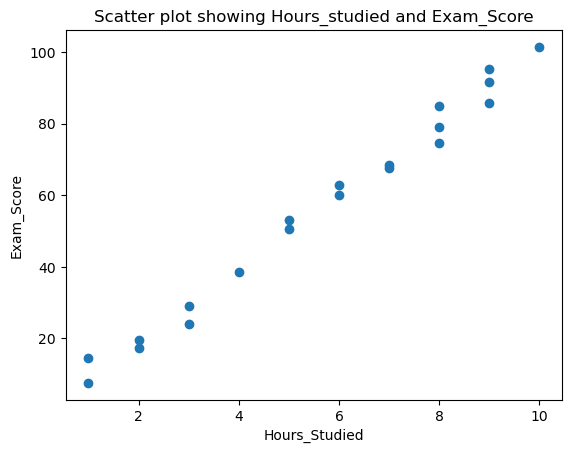

In [4]:
#let's visualize the data using scatter plot
plt.scatter(df['Hours_Studied'],df['Exam_Score'])
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title("Scatter plot showing Hours_studied and Exam_Score")
plt.show()

In [5]:
#let's get correlation
#the more it is closer to +1, the more correlated it is, the more it is closer to -1, the less correlated it is
df.corr()

,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.994073
Exam_Score,0.994073,1.000000


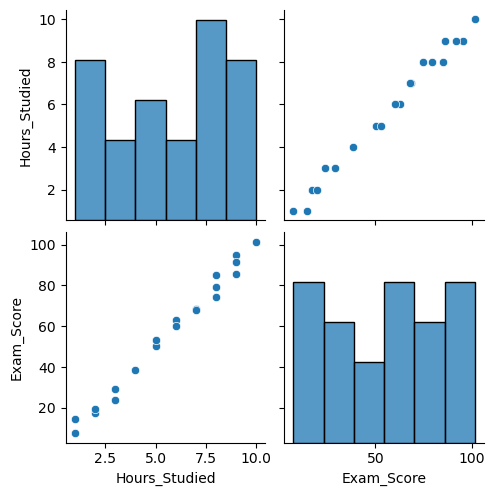

In [6]:
#let's visualie the correlataion
sns.pairplot(df)
plt.show()

In [7]:
#now, let's get X and Y dataset
#X is independent feature, where is Y dependent feature
X=df[["Hours_Studied"]]
Y=df["Exam_Score"]

In [8]:
X

,Hours_Studied
0,9
1,1
2,9
3,7
4,9
5,8
6,1
7,8
8,8
9,3


## Train Test Split

In [10]:
#train test split
from sklearn.model_selection import train_test_split

In [27]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Check shape to confirm match
print(X_train.shape)  # Example: (15, 1)
print(Y_train.shape)  # Example: (15,)


(15, 1)
(15,)


In [28]:
#standardization
#let's standardize the input feature using Z core where mean=0, std dev=0

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[ 1.00278165],
       [-0.5805578 ],
       [ 0.60694679],
       [-1.37222752],
       [ 0.21111193],
       [-0.18472293],
       [ 1.39861651],
       [-0.97639266],
       [-0.18472293],
       [ 1.39861651],
       [ 0.21111193],
       [ 1.00278165],
       [-1.37222752],
       [ 0.60694679],
       [-1.76806238]])

In [29]:
X_test.shape

(5, 1)

In [30]:
#X test should be in 2D
X_test=X_test.values.reshape(-1,1)
X_test.shape

(5, 1)

In [31]:
#now scale y train on std dev and mean of X train
X_test=scaler.transform(X_test)
X_test

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.39861651],
       [ 1.79445137],
       [-0.97639266],
       [-1.76806238],
       [ 1.00278165]])

## Apply the Model

In [32]:
#let's apply linear regression model
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [33]:
regression.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [34]:
regression.coef_

array([26.14072307])

In [36]:
regression.intercept_

54.074000000000005

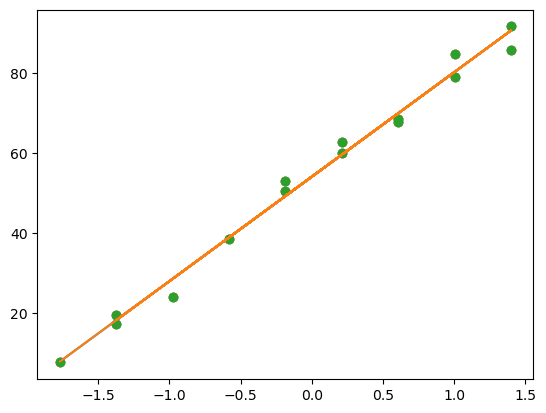

In [39]:
#plotting the best fit line
plt.scatter(X_train, Y_train)
plt.plot(X_train, regression.predict(X_train))
plt.show()

## Prediction of Test Data

In [41]:
#prediction of test data
Y_pred=regression.predict(X_test)

In [70]:
#Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mse=mean_squared_error(Y_test,Y_pred)
print(mse)

20.212684799621357


In [49]:
mae=mean_absolute_error(Y_test,Y_pred)
print(mae)

3.6328746518105843


In [52]:
rmse=np.sqrt(mse)
rmse

4.495851954815834

In [54]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)
r2

0.9835063708722294

In [59]:
#adjusted r2
n=len(Y_test)
p=X_test.shape[1]
Adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
Adjusted_r2

0.9780084944963058

In [62]:
#OLS Linear Model
import statsmodels.api as sm
model=sm.OLS(Y_train, X_train).fit()

In [63]:
prediction=model.predict(X_test)

In [64]:
prediction

array([ 36.5608468 ,  46.90825627, -25.52361003, -46.21842897,
        26.21343733])

In [65]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:             Exam_Score   R-squared (uncentered):                   0.189
Model:                            OLS   Adj. R-squared (uncentered):              0.131
Method:                 Least Squares   F-statistic:                              3.264
Date:                Wed, 11 Jun 2025   Prob (F-statistic):                      0.0924
Time:                        12:13:24   Log-Likelihood:                         -81.157
No. Observations:                  15   AIC:                                      164.3
Df Residuals:                      14   BIC:                                      165.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


In [68]:
##prediction for new data
regression.predict(scaler.transform([[4]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([38.89779944])